In [1]:
from coupled_dipole_model import Sphere_Polarizability
from coupled_dipole_model import CrossSections
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

hbar_eVs = 6.58212E-16 # Planck's constant [eV*s]
c = 2.998E+10 # speed of light [cm/s]


## Single Sphere
Here we see that the coupled dipole model holds very well for a sphere with radius 50 nm or less. Once above 50 nm, the quadrupole begins growing in. By 90 nm sphere, the quadrupole peak is of higher intensity than the dipole. 

In [2]:
num_part_per_struct = 1
w_all = np.arange(2,3,.01)/hbar_eVs
num_freq = len(w_all)
gap = np.array([0])
num_gap = len(gap)
radius = 50

def_centers = np.zeros((num_gap, num_freq, num_part_per_struct, 3)) # [number of unique structures, number of particles per structure, 3 cart. coords]
def_all_radii = np.zeros((num_gap, num_freq, num_part_per_struct)) # [number of unique structures, number of particles per structure, 1]


for gap_i in range(0, num_gap):
    def_centers[gap_i, :, 0,:] = np.array([ 0, 0, -radius-gap[gap_i]/2 ])*1.E-7

def_all_radii[:,:,0] = radius*1.E-7


In [3]:
calc_dips = CrossSections(centers=def_centers, 
                                   all_radii=def_all_radii,
                                   w=w_all,
                                   num=num_part_per_struct, 
                                   n=1.0, 
                                   wp=8.959/hbar_eVs, 
                                   eps_inf=9.695, 
                                   gam_drude=0.073/hbar_eVs)    

Pext, Pabs = calc_dips.cross_sects(drive=np.array([0,0,1]))

(2.0, 3.0)

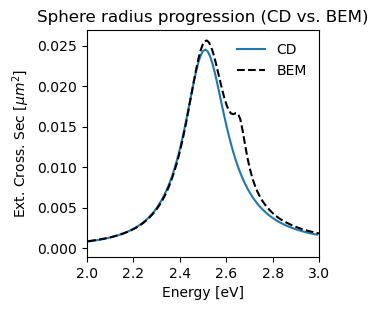

In [4]:
fig = plt.figure(figsize=(3.,3.), dpi= 100, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1, 1, 1)
colorscheme = ['black', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
pick_color = 0
 
for which_gap in range(0, num_gap):
    plt.plot(w_all*hbar_eVs, Pabs[which_gap, :,0],label='CD')
    
    
data = loadmat(str('check_with_simulation/single_sphere/Spectrum_sph_ret_')+str(radius)+str('nm_drude_n1.0.mat'))
energy = data['en_ev'][0]
abs_cross = data['abs_mcsqrd'][0]
ext_cross = data['ext_mcsqrd'][0]
plt.plot(energy, abs_cross,'--', color=colorscheme[pick_color],label='BEM')
pick_color=pick_color + 1
plt.legend(frameon=False)
plt.title('Sphere radius progression (CD vs. BEM)')
plt.ylabel('Ext. Cross. Sec [$\mu m^2$]')
plt.xlabel('Energy [eV]')
plt.xlim([2,3])

## Sphere Homodimer

In [7]:
num_part_per_struct = 2
w_all = np.arange(2,3,.01)/hbar_eVs
num_freq = len(w_all)
gap = np.array([10, 20, 30, 40, 50])
num_gap = len(gap)
radius = 20

def_centers = np.zeros((num_gap, num_freq, num_part_per_struct, 3)) # [number of unique structures, number of particles per structure, 3 cart. coords]
def_all_radii = np.zeros((num_gap, num_freq, num_part_per_struct)) # [number of unique structures, number of particles per structure, 1]

for gap_i in range(0, num_gap):
    def_centers[gap_i, :, 0,:] = np.array([ 0, 0, -radius-gap[gap_i]/2 ])*1.E-7
    def_centers[gap_i, :, 1,:] = np.array([ 0, 0, radius+gap[gap_i]/2 ])*1.E-7

def_all_radii[:,:,0] = radius*1.E-7
def_all_radii[:,:,1] = radius*1.E-7

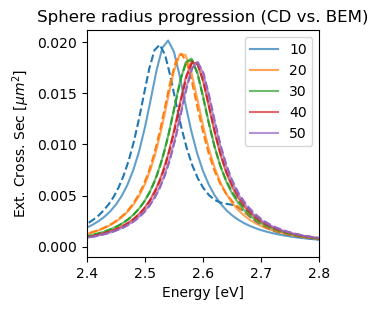

In [10]:
fig = plt.figure(figsize=(3.,3.), dpi= 100, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1, 1, 1)

colorscheme = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
calc_dips = CrossSections(centers=def_centers, 
                                   all_radii=def_all_radii,
                                   w=w_all,
                                   num=num_part_per_struct, 
                                   n=1.0, 
                                   wp=8.959/hbar_eVs, 
                                   eps_inf=9.695, 
                                   gam_drude=0.073/hbar_eVs)    

Pext, Pabs = calc_dips.cross_sects(drive=np.array([0,0,1]))
pick_color=0


for which_gap in range(0, num_gap):
    plt.plot(w_all*hbar_eVs, Pabs[which_gap,:,1]+Pabs[which_gap, :,0],label=str(gap[which_gap]), alpha=.7)
    data = loadmat(str('check_with_simulation/sphere_homodimer/Spectrum_sph_ret_gap')+str(gap[which_gap])+str('nm_')+str(radius)+str('nm_drude_n1.0.mat'))
    
    energy = data['en_ev'][0]
    abs_cross = data['abs_mcsqrd'][0]
    ext_cross = data['ext_mcsqrd'][0]
    plt.plot(energy, abs_cross,'--', color=colorscheme[pick_color])
    pick_color=pick_color + 1
    
    plt.legend(frameon=False)
    plt.title('Sphere radius progression (CD vs. BEM)')
    plt.ylabel('Ext. Cross. Sec [$\mu m^2$]')
    plt.xlabel('Energy [eV]')
    plt.xlim([2.4,2.8])    
    
    
# plt.xlim([2.5, 2.7])

plt.legend()    